IMPORTAR LIBRERIAS

In [ ]:
import tensorflow
from keras import optimizers
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

CERRAR SESIONES ACTIVAS

In [ ]:
K.clear_session()

DEFINIR DIRECTORIOS

In [ ]:
datos_entrenamiento = ".\Entrenamiento"
datos_validacion = ".\Validacion"

DEFINIR PARÁMETROS

In [ ]:
altura, longitud = 50, 50
batch_size = 32

PREPROCESAR IMÁGENES

In [ ]:
Generador1 = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
)

Generador2 = ImageDataGenerator(
    rescale = 1./255
)

imagen_entrenamiento = Generador1.flow_from_directory(
    datos_entrenamiento,
    target_size = (altura, longitud),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = "categorical"
)

imagen_validacion = Generador2.flow_from_directory(
    datos_validacion,
    target_size = (altura, longitud),
    batch_size = batch_size,
    color_mode = 'grayscale',
    class_mode = "categorical"
)

Found 52523 images belonging to 21 classes.
Found 10589 images belonging to 21 classes.


IMPRIMIENDO IMÁGENES DEL GENERADOR

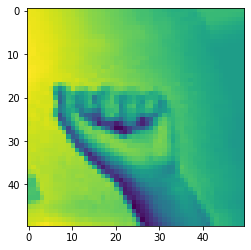

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'I': 6, 'K': 7, 'L': 8, 'M': 9, 'N': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'T': 15, 'U': 16, 'V': 17, 'W': 18, 'X': 19, 'Y': 20}


In [ ]:
plt.imshow(next(imagen_entrenamiento)[0][1,...,0])
plt.show()
print(imagen_entrenamiento.class_indices)

DEFINIR PARÁMETROS

In [ ]:
epocas = 30
pasos_entrenamiento = imagen_entrenamiento.n//batch_size
pasos_validacion = imagen_validacion.n//batch_size
print("Los pasos en entrenamiento son: " + str(pasos_entrenamiento))
print("Los pasos en validacion son: " + str(pasos_validacion))
filtrosconv0 = 32
filtrosconv1 = 64
filtrosconv2 = 64
tam_filtro0 = (4, 4)
tam_filtro1 = (3, 3)
tam_filtro2 = (2, 2)
tam_pool = (2, 2)
clases = 21

Los pasos en entrenamiento son: 1641
Los pasos en validacion son: 330


CREAR RED NEURONAL Y SU COMPOSICIÓN DE LA RED NEURONAL

In [ ]:
cnn = Sequential()
cnn.add(Convolution2D(filtrosconv0, tam_filtro0, input_shape=(altura, longitud, 1), activation="relu"))
cnn.add(MaxPooling2D(pool_size=tam_pool))

cnn.add(Convolution2D(filtrosconv1, tam_filtro1, activation="relu"))
cnn.add(Convolution2D(filtrosconv1, tam_filtro1, activation="relu"))
cnn.add(MaxPooling2D(pool_size=tam_pool))

cnn.add(Convolution2D(filtrosconv2, tam_filtro2, activation="relu"))
cnn.add(Convolution2D(filtrosconv2, tam_filtro2, activation="relu"))
cnn.add(MaxPooling2D(pool_size=tam_pool))

cnn.add(Flatten())
cnn.add(Dense(1345, activation="relu"))
cnn.add(Dropout(0.20))
cnn.add(Dense(clases, activation="softmax"))

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          16448     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          1

DEFINIR OPTIMIZADOR

In [ ]:
optimizador = tensorflow.keras.optimizers.Adam(learning_rate = 0.0005)
cnn.compile(loss="categorical_crossentropy", optimizer=optimizador, metrics=["accuracy"])

ENTRENAMIENTO DE LA RED

In [ ]:
clasificador = cnn.fit(imagen_entrenamiento,
                        validation_data = imagen_validacion,
                        steps_per_epoch = pasos_entrenamiento,
                        validation_steps = pasos_validacion,
                        batch_size = batch_size,
                        epochs = epocas)

cnn.save("Modelo.h5")
cnn.save_weights("Pesos.h5")

Epoch 1/30
1641/1641 [==============================] - 299s 182ms/step - loss: 0.6685 - accuracy: 0.7908 - val_loss: 0.2953 - val_accuracy: 0.9253
Epoch 2/30
1641/1641 [==============================] - 232s 141ms/step - loss: 0.1123 - accuracy: 0.9642 - val_loss: 0.2259 - val_accuracy: 0.9444
Epoch 3/30
1641/1641 [==============================] - 231s 141ms/step - loss: 0.0688 - accuracy: 0.9777 - val_loss: 0.0566 - val_accuracy: 0.9815
Epoch 4/30
1641/1641 [==============================] - 229s 139ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.2130 - val_accuracy: 0.9552
Epoch 5/30
1641/1641 [==============================] - 228s 139ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0813 - val_accuracy: 0.9779
Epoch 6/30
1641/1641 [==============================] - 229s 139ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0557 - val_accuracy: 0.9841
Epoch 7/30
1641/1641 [==============================] - 230s 140ms/step - loss: 0.0283 - accuracy: 0.9913 - val_

PLOT PRECISIÓN Y PÉRDIDA

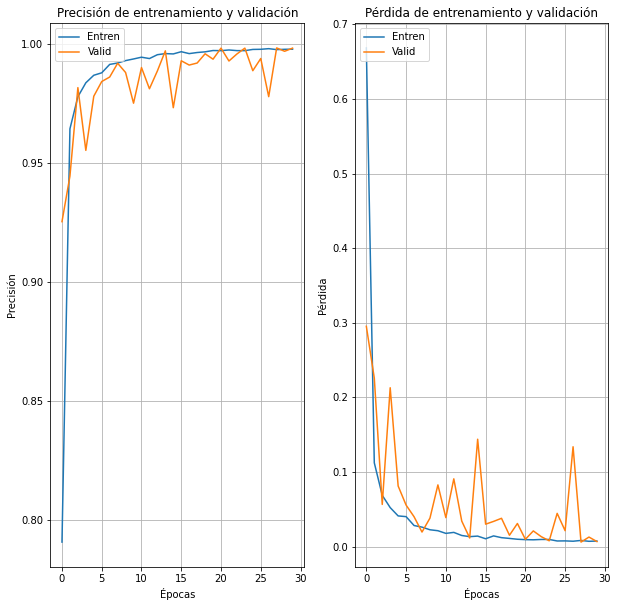

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(clasificador.history['accuracy'], '-')
plt.plot(clasificador.history['val_accuracy'], '-')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(['Entren','Valid'], loc='upper left')
plt.title('Precisión de entrenamiento y validación')
plt.grid()

plt.subplot(1,2,2)
plt.plot(clasificador.history['loss'], '-')
plt.plot(clasificador.history['val_loss'], '-')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(['Entren','Valid'], loc='upper left')
plt.title('Pérdida de entrenamiento y validación')
plt.grid()
plt.show()

EXTRAER DATOS PARA EXPORTARLOS A EXCEL

In [ ]:
import pandas as pd

Lista_Precision = clasificador.history['accuracy']
Lista_Precision.insert(0, 'Precisión')
Lista_Precision_Validacion = clasificador.history['val_accuracy']
Lista_Precision_Validacion.insert(0, 'Precisión de Validación')
Lista_Perdida = clasificador.history['loss']
Lista_Perdida.insert(0, 'Pérdida')
Lista_Perdida_Validacion = clasificador.history['val_loss']
Lista_Perdida_Validacion.insert(0, 'Pérdida de Validación')
Lista_Final = [Lista_Precision, Lista_Precision_Validacion, Lista_Perdida, Lista_Perdida_Validacion]

CREAR DATAFRAME Y GUARDARLO

In [ ]:
Dataframe = pd.DataFrame(Lista_Final).transpose()
Dataframe.to_excel('Datos_Red.xlsx', index = False)

IMPORTAR LIBRERIAS PARA GRAFICAR LA MATRIZ DE COFUSIÓN

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DECLARAR VARIABLES

In [ ]:
Nombre_Clases = ['A', 'B', 'C', 'D', 'E', 'F', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V', 'W', 'X', 'Y']
altura, longitud = 50, 50
batch_size = 32

GENERAR EL DIRECTORIO DE TESTEO

In [ ]:
Directorio_Testeo = './Testeo'
Generador_Testeo = ImageDataGenerator()
Datos_Testeo = Generador_Testeo.flow_from_directory(
                Directorio_Testeo,
                target_size = (longitud, altura),
                batch_size = batch_size,
                color_mode = 'grayscale',
                class_mode = "categorical"
)

CARGAR LA RED NEURONAL CREADA

In [ ]:
modelo = 'Modelo.h5'
pesos_modelo = 'Pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)

REALIZAR LA PREDICCIÓN

In [ ]:
Predicciones = cnn.predict(Datos_Testeo)
Datos_Prediccion = np.argmax(Predicciones, axis=1)
Datos_Reales = Datos_Testeo.classes
Matriz = confusion_matrix(Datos_Reales, Datos_Prediccion)
plot_confusion_matrix(conf_mat = Matriz, figsize=(9, 9), class_names = Nombre_Clases, show_normed = True)
plt.tight_layout()